In [1]:
from qiskit import *
from qiskit.tools.monitor import job_monitor


uppg_circuit = QuantumCircuit(4)
uppg_circuit.cx(3, 1)
uppg_circuit.cx(1, 0)
uppg_circuit.cx(0, 1)
uppg_circuit.ccx(3, 2, 1)
uppg_circuit.cx(1, 2)
uppg_circuit.cx(3, 2)

In [2]:
uppg_circuit = QuantumCircuit(4)
uppg_circuit.cx(3, 1)
uppg_circuit.cx(1, 0)
uppg_circuit.cx(0, 1)
uppg_circuit.ccx(3, 2, 1)
uppg_circuit.cx(1, 2)
uppg_circuit.cx(3, 2)
uppg_gate = uppg_circuit.to_gate()
uppg_gate
my_gate = QuantumCircuit(4)
my_gate.append(uppg_gate, [0,1,2,3])
my_gate.draw()

┌───────────┐
q_0: ┤0          ├
     │           │
q_1: ┤1          ├
     │  circuit7 │
q_2: ┤2          ├
     │           │
q_3: ┤3          ├
     └───────────┘

In [3]:
def logic(s2, s1, s0, B, A):
    qc = QuantumCircuit(6, 1)
    
    #conditions
    if(s1 == '1'):
        qc.x(0)
    if(s2 == '1'):
        qc.x(1)
    if(s0 == '1'):
        qc.x(2)
    if(B == '1'):
        qc.x(3) 
        qc.x(4)
    if(A == '1'):
        qc.x(5)
    qc.barrier()
    
    #import the gate
    qc.append(uppg_gate, [2, 3, 4, 5])
    qc.cswap(1, 2, 3)
    qc.cswap(0, 3, 4)
    qc.barrier()
    
    #measurements
    qc.measure(3, 0)
    
    #backend
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, memory= True)
    output = job.result().get_memory()[0]
    
    return qc, output

s2 s1 s0 B A
0 0 0 0 0 = 0
0 0 0 0 1 = 0
0 0 0 1 0 = 0
0 0 0 1 1 = 1
----------------------
0 0 1 0 0 = 1
0 0 1 0 1 = 1
0 0 1 1 0 = 1
0 0 1 1 1 = 0
----------------------
0 1 0 0 0 = 0
0 1 0 0 1 = 1
0 1 0 1 0 = 1
0 1 0 1 1 = 1
----------------------
0 1 1 0 0 = 1
0 1 1 0 1 = 0
0 1 1 1 0 = 0
0 1 1 1 1 = 0
----------------------
1 0 0 0 0 = 0
1 0 0 0 1 = 1
1 0 0 1 0 = 1
1 0 0 1 1 = 0
----------------------
1 0 1 0 0 = 1
1 0 1 0 1 = 0
1 0 1 1 0 = 0
1 0 1 1 1 = 1
----------------------
1 1 0 0 0 = 0
1 1 0 0 1 = 1
1 1 0 1 0 = 1
1 1 0 1 1 = 1
----------------------
1 1 1 0 0 = 1
1 1 1 0 1 = 0
1 1 1 1 0 = 0
1 1 1 1 1 = 0
----------------------


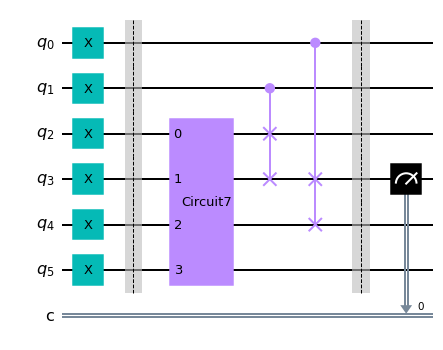

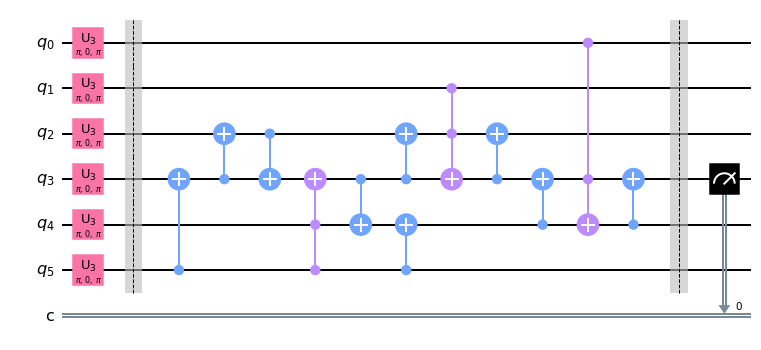

In [4]:
print('{} {} {} {} {}'.format('s2', 's1', 's0', 'B', 'A'))
for s2 in ['0', '1']:
    for s1 in ['0', '1']:
        for s0 in ['0', '1']:
            for B in ['0', '1']:
                for A in ['0', '1']:
                    qc, output = logic(s2, s1, s0, B, A)
                    print('{} {} {} {} {}'.format(s2, s1, s0, B, A), '=', output)
            print('----------------------')

display(qc.draw('mpl'))
display(qc.decompose().draw('mpl'))

In [5]:
qc = QuantumCircuit(6)
qc.append(uppg_gate, [2, 3, 4, 5])
qc.cswap(0, 2, 3)
qc.cswap(1, 3, 4)
qc.draw()

q_0: ──────────────■────
                   │    
q_1: ──────────────┼──■─
     ┌───────────┐ │  │ 
q_2: ┤0          ├─X──┼─
     │           │ │  │ 
q_3: ┤1          ├─X──X─
     │  circuit7 │    │ 
q_4: ┤2          ├────X─
     │           │      
q_5: ┤3          ├──────
     └───────────┘

In [4]:
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from matplotlib import style
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.tools.visualization import plot_bloch_vector

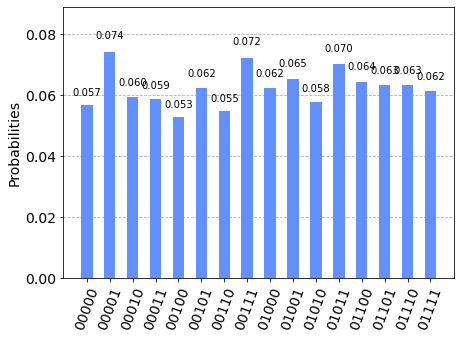

In [7]:
#plot histogram for the uppg gate
qc = QuantumCircuit(5, 5)
qc.cx(3, 1)
qc.cx(1, 0)
qc.cx(0, 1)
qc.ccx(3, 2, 1)
qc.cx(1, 2)
qc.cx(3, 2)
qc.cswap(1, 2, 3)
qc.cswap(0, 3, 4)
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)
qc.measure(3, 3)


job = execute(qc, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()
count = result.get_counts()
plot_histogram(count) 

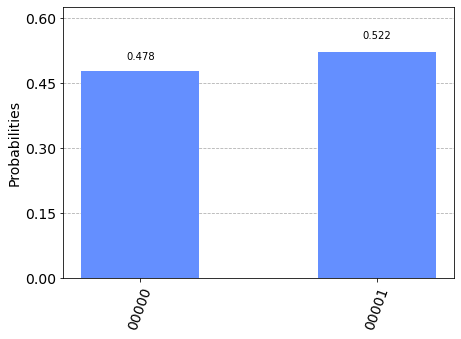

In [9]:
qc = QuantumCircuit(6, 5)
qc.append(uppg_gate, [2, 3, 4, 5])
qc.cswap(1, 2, 3)
qc.cswap(0, 3, 4)
qc.barrier()

qc.h(0)
qc.h(3)

#measurements
qc.measure(3, 0)

job = execute(qc, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()
count = result.get_counts()
plot_histogram(count) 

In [2]:
IBMQ.load_account()
IBMQ.providers()
providers = IBMQ.get_provider('ibm-q')
provider = IBMQ.get_provider("ibm-q")
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

simulator_mps has 2 queued and simulated qubits
ibmq_belem has 2 queued and 5 qubits
ibmq_lima has 8 queued and 5 qubits
ibmq_qasm_simulator has 4 queued and simulated qubits
ibmq_armonk has 2 queued and 1 qubits
simulator_statevector has 3 queued and simulated qubits
ibmq_santiago has 5 queued and 5 qubits
ibmq_bogota has 5 queued and 5 qubits
ibmq_quito has 21 queued and 5 qubits
ibmqx2 has 2 queued and 5 qubits
simulator_extended_stabilizer has 4 queued and simulated qubits
simulator_stabilizer has 4 queued and simulated qubits
ibmq_manila has 14 queued and 5 qubits


Job Status: job has successfully run
None


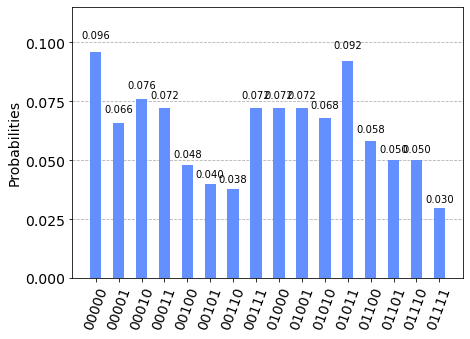

In [5]:
#plot histogram for the uppg gate
qc = QuantumCircuit(5, 5)
qc.cx(3, 1)
qc.cx(1, 0)
qc.cx(0, 1)
qc.ccx(3, 2, 1)
qc.cx(1, 2)
qc.cx(3, 2)
qc.cswap(1, 2, 3)
qc.cswap(0, 3, 4)
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)
qc.measure(3, 3)


backend = provider.get_backend("ibmq_belem")
job = execute(qc, backend=backend, shots=500)
print(job_monitor(job))
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)